In [1]:
import os
import codecs
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import networkx as nx


def read(file):
	fp = codecs.open(file,"r",encoding='utf-8', errors='ignore')
	text = fp.read()
	return text

In [2]:
# Reading the Network Graph

path='email.txt'

data=read(path).split('\n')
data=data[:len(data)-1]

edges=[]
nodes={}

cou_ed=0 
for each in data:
    
    edge=each.split(" ")
    edge=[float(i) for i in edge]
    edges.append(edge)
    if edge[0] not in nodes.keys():
        nodes[edge[0]]=[]
        nodes[edge[0]].append([edge[1],1])
    else:
        nodes[edge[0]].append([edge[1],1])
        
    if edge[1] not in nodes.keys():
        nodes[edge[1]]=[]

        
    cou_ed+=1.0

cou_nod=0
node=[]        
graph=[]

for each in nodes.keys():
    node.append(each)
    nodes[each].sort()
    cou_nod+=1.0

In [3]:
H=nx.DiGraph()           # Creating Directed Graph
for each in nodes.keys():
    H.add_node(each)
for i in range(len(edges)):
    H.add_edge(edges[i][0],edges[i][1])
#H = nx.DiGraph(G)

In [4]:
page_rank = nx.pagerank(H, alpha=0.9)    # Page Rank ALgorithm
hub_score,auth_score=nx.hits(H)          # Hit Algorithm

In [5]:
rank1=[]
for each in page_rank.keys():
    rank1.append([page_rank[each],each])

rank2=[]
for each in page_rank.keys():
    rank2.append([hub_score[each],each])
    
rank3=[]
for each in page_rank.keys():
    rank3.append([auth_score[each],each])
    
rank1.sort(reverse=True)
rank2.sort(reverse=True)
rank3.sort(reverse=True)

rank1=[i[1] for i in rank1]
rank3=[i[1] for i in rank3]
rank2=[i[1] for i in rank2]
    

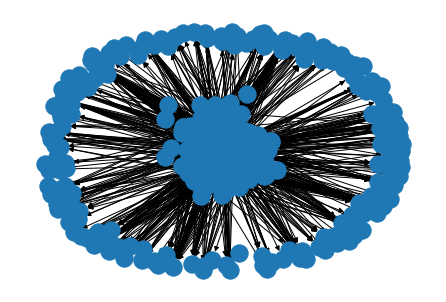

In [6]:
nx.draw(H)

In [7]:
rank1[:10]          # Using Page Rank Algorithm

[1.0, 130.0, 160.0, 532.0, 62.0, 86.0, 107.0, 365.0, 121.0, 227.0]

In [8]:
rank2[:10]         # Using Hub Score

[160.0, 82.0, 121.0, 107.0, 62.0, 249.0, 434.0, 183.0, 86.0, 114.0]

In [9]:
rank3[:10]         # Using Auth Score

[160.0, 107.0, 62.0, 434.0, 121.0, 183.0, 128.0, 249.0, 256.0, 129.0]

In [10]:
nx.density(H)

0.025342411448732432